In [25]:
import os
from langgraph.graph import StateGraph, END
from dotenv import load_dotenv


In [26]:
load_dotenv()
api_key=os.getenv("API_KEY")

In [27]:
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq
from markdown import markdown

In [28]:
llm=ChatGroq(model="llama-3.1-8b-instant", api_key=api_key, temperature=0)

In [29]:
class AppState(dict):pass

In [30]:
def gen_content(state:AppState)->AppState:
    prompt="""
    Explain about {text} in 3 bullet ponits
    """
    gen_temp=PromptTemplate.from_template(prompt)
    chain=gen_temp|llm
    gen_res=chain.invoke({"text":state["text"]})
    state["content"]=gen_res.content
    return state
    

In [31]:
def translate(state:AppState)->AppState:
    prompt = """
    translate {trans} to french
    """
    trans_temp=PromptTemplate.from_template(prompt)
    trans_chain=trans_temp|llm
    trans_res=trans_chain.invoke({"trans":state["content"]})
    state["trans"]=trans_res.content
    return state
    

In [38]:
wf=StateGraph(AppState)
wf.add_node("generate",gen_content)
wf.add_node("translate",translate)
wf.set_entry_point("generate")
wf.add_edge("generate","translate")
wf.add_edge("translate",END)
graph=wf.compile()




In [ ]:
output=graph.invoke({"text":"AI"})

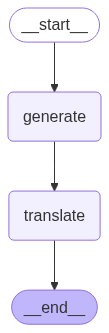

In [40]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [ ]:
output

"Voici trois points clés sur l'Intelligence Artificielle (IA) :\n\n* **Définition et Types** : L'Intelligence Artificielle fait référence au développement de systèmes informatiques capables de réaliser des tâches qui nécessitent typiquement l'intelligence humaine, telles que l'apprentissage, la résolution de problèmes, la prise de décision et la perception. Il existe plusieurs types d'IA, notamment :\n + L'IA étroite ou faible : Conçue pour effectuer une tâche spécifique, telle que la reconnaissance faciale ou la traduction de langues.\n + L'IA générale ou forte : Vise à créer une machine capable de réaliser n'importe quelle tâche intellectuelle que peut accomplir un humain.\n + L'IA surintelligente : Significativement plus intelligente que les meilleures cerveaux humains, potentiellement entraînant une croissance exponentielle des progrès technologiques.\n\n* **Applications et Avantages** : L'IA a de nombreuses applications dans divers secteurs, notamment :\n + Santé : Diagnostic assi